# MBAR 

Updated: 12/21/2024 

By: van

In [1]:
!printf "This notebook is found in...\n$(echo $(realpath .))"

This notebook is found in...
/scratch/van/ippoi/qmmm/h98q/mbar

In [2]:
import os
import sys
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
#from matplotlib.ticker import AutoMinorLocator, LogLocator, NullFormatter
# plt.style.use('/home/van/Scripts/bin/v.mplstyle')
import seaborn as sb
from glob import glob
from sklearn.utils import resample

import pymbar
from pymbar.mbar_pmf import mbar_pmf

In [3]:
os.makedirs('img', exist_ok=True)

In [4]:

step="step5"
rep="00"

n_windows = 42
val_min = -1.10
val_max = 3.00
fc = 300.0
nbins = n_windows - 1


In [5]:

val0_k = np.linspace(val_min, val_max, n_windows)
K_k = np.ones(n_windows) * fc


In [6]:

val_kn = []
for i in range(n_windows):
    fnames = sorted(glob(f'../{i:02d}/{step}.{rep}_equilibration.cv'))
    arrays = [np.loadtxt(f, usecols=1)[::] for f in fnames[:]]
    val_kn.append(np.concatenate(arrays))


In [7]:

for i in range(n_windows):
    print("Window %02d:" % i, pymbar.timeseries.subsampleCorrelatedData(val_kn[i], conservative=True))
    

Window 00: range(0, 51, 2)
Window 01: range(0, 50, 2)
Window 02: range(0, 50)
Window 03: range(0, 50, 2)
Window 04: range(0, 50)
Window 05: range(0, 50, 3)
Window 06: range(0, 50, 2)
Window 07: range(0, 50, 4)
Window 08: range(0, 50, 4)
Window 09: range(0, 50, 7)
Window 10: range(0, 50)
Window 11: range(0, 50, 2)
Window 12: range(0, 50)
Window 13: range(0, 50, 2)
Window 14: range(0, 50, 3)
Window 15: range(0, 50, 6)
Window 16: range(0, 50, 4)
Window 17: range(0, 50, 2)
Window 18: range(0, 50, 2)
Window 19: range(0, 50, 4)
Window 20: range(0, 34, 3)
Window 21: range(0, 50, 2)
Window 22: range(0, 50, 3)
Window 23: range(0, 50, 2)
Window 24: range(0, 50, 3)
Window 25: range(0, 50, 3)
Window 26: range(0, 50, 4)
Window 27: range(0, 50, 2)
Window 28: range(0, 50, 2)
Window 29: range(0, 50, 3)
Window 30: range(0, 50, 2)
Window 31: range(0, 50)
Window 32: range(0, 50, 2)
Window 33: range(0, 50, 2)
Window 34: range(0, 50)
Window 35: range(0, 50)
Window 36: range(0, 50)
Window 37: range(0, 50, 2

In [8]:
# mbar = mbar_B(val_kn, val0_k, K_k, 300.0, u_kn=np.array(ene_pm3))
mbar = mbar_pmf(val_kn, val0_k, K_k, fc)

K (total states) = 42, total samples = 2085
N_k = 
[51 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 34 50 50 50
 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50]
There are 42 states with samples.
Initial dimensionless free energies with method BAR
f_k = 
[ 0.00000000e+00 -4.69030897e-02  6.08736443e-01  2.07753957e+00
  4.17390653e+00  6.50567703e+00  9.79463665e+00  1.39810438e+01
  1.83758549e+01  2.35709666e+01  2.89464383e+01  3.30039496e+01
  3.65410495e+01  3.97197580e+01  4.16128198e+01  4.25131429e+01
  4.22050940e+01  4.19371247e+01  4.11943739e+01  4.00176189e+01
  3.83188617e+01  4.03843152e+01  4.68397190e+01  5.31309398e+01
  5.87342876e+01  6.42279368e+01  7.01020004e+01  7.54050703e+01
  8.05234895e+01  8.54071023e+01  9.03152380e+01  9.46620113e+01
  9.95452282e+01  1.04576561e+02  1.09777485e+02  1.15582972e+02
  1.21015728e+02  1.27138647e+02  1.33679417e+02  1.39793188e+02
  1.46257428e+02  1.52611550e+02]
Determining dimensionless free energies by 

In [9]:

bin_centers, f_i, df_i, reweighting_entropy = mbar.get_pmf(val_min, val_max, nbins)
bin_centers, f_i, df_i, reweighting_entropy = mbar.get_pmf(val_min, val_max, nbins, uncertainties='from-specified', pmf_reference=f_i[:20].argmin())
np.savetxt(f"freefile_mbar_{step}.{rep}", np.column_stack((bin_centers, f_i, df_i)))

# Histogram + Preliminary PMF 

## _Not for publication_

In [10]:
initial = np.loadtxt(f"freefile_mbar_{step}.{rep}")

xdata=initial[:,0]
ydata=initial[:,1] - initial[:10,1].min()
edata=initial[:,2]

dgd = round(initial[:,1].max() - initial[:10,1].min(),1) # Delta G daggerV
err = round(initial[initial[:,1].argmax()][2], 1) # mbar error

c=sb.color_palette('deep', n_windows)
_xfrac=0.05
_yfrac=0.9

opa=0.4

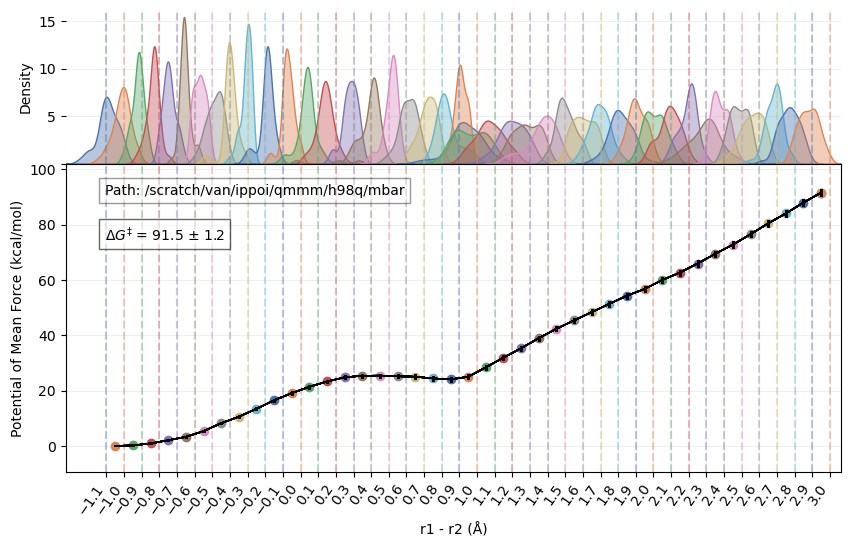

In [41]:
# fig = plt.figure(sharex=True, figsize=(7.5,5), dpi=150)
fig = plt.figure(figsize=(10,6))

axs = fig.subplot_mosaic(
    """
    A
    B
    """,height_ratios=[1,2],sharex=True)

for i in range(n_windows):
    sb.kdeplot(val_kn[i], fill=True, alpha=opa, ax=axs['A'], color=c[i])
    axs['A'].axvline(x=val0_k[i], linestyle='--', alpha=opa, color=c[i])
    axs['A'].yaxis.get_major_ticks()[0].label1.set_visible(False)
    axs['A'].grid(linestyle='-', alpha=opa-0.2)

    
    axs['B'].errorbar(xdata, ydata, yerr=edata, linewidth=1, c='black', alpha=opa+0.1)
    axs['B'].scatter(xdata[i-1], ydata[i-1], color=c[i])
    axs['B'].axvline(x=val0_k[i], linestyle='--', alpha=opa, color=c[i])
    axs['B'].grid(linestyle='-', alpha=opa-0.2)
    

axs['B'].annotate(f"Path: {os.getcwd()}", 
                    xy=(_xfrac, _yfrac), xycoords='axes fraction', bbox=dict(fc="w", alpha=opa))
axs['B'].annotate(f"$\Delta G^\ddag$ = {dgd} $\pm$ {err}", 
                    xy=(_xfrac,_yfrac-0.15), xycoords='axes fraction',bbox=dict(fc='w', alpha=opa+0.2))

axs['B'].set_xlabel("r1 - r2 (Å)")
axs['B'].set_ylabel("Potential of Mean Force (kcal/mol)")

plt.margins(x=0.00, y=0.1)
plt.xticks(ticks=val0_k, rotation=55, ha='right')

sb.despine(left=True, bottom=False, right=True, ax=axs['A'])
fig.subplots_adjust(wspace=0, hspace=0)


plt.savefig(f"img/prelim-B-{step}.{rep}.png")
plt.show()

In [ ]:
# Copy notebook to templates directory

# !cp mbar.ipynb /home/van/Scripts/amber/mbar/mbar.ipynb